In [1]:
import numpy as np
from parafoil import CamberThicknessAirfoil, CircularPassage

airfoil = CamberThicknessAirfoil(
    inlet_angle=np.radians(40.0),
    outlet_angle=np.radians(-20.0),
    stagger_angle=np.radians(0.0),
    upper_thick_prop=[0.035, 0.14, 0.14, 0.035, 0.007],
    lower_thick_prop=[0.035, 0.14, 0.14, 0.035, 0.007],
    leading_prop=0.5,
    trailing_prop=0.5,
    chord_length=1
)

# 100x chord length radius traditionally for airfoil external flow problem
passage = CircularPassage(
    airfoil=airfoil,
    radius=40.0,
)

passage.visualize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 10%] Meshing curve 4 (Line)
Info    : [ 10%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 7 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 10%] Meshing curve 11 (Line)
Info    : [ 10%] Meshing curve 12 (Line)
Info    : [ 10%] Meshing curve 13 (Line)
Info    : [ 10%] Meshing curve 14 (Line)
Info    : [ 10%] Meshing curve 15 (Line)
Info    : [ 20%] Meshing curve 16 (Line)
Info    : [ 20%] Meshing curve 17 (Line)
Info    : [ 20%] Meshing curve 18 (Line)
Info    : [ 20%] Meshing curve 19 (Line)
Info    : [ 20%] Meshing curve 20 (Line)
Info    : [ 20%] Meshing curve 21 (Line)
Info    : [ 20%] Meshing curve 22 (Line)
Info    : [ 20%] Meshing curve 23 (Line)
Info    : [ 20%] Meshing curve 24 (Line)
I

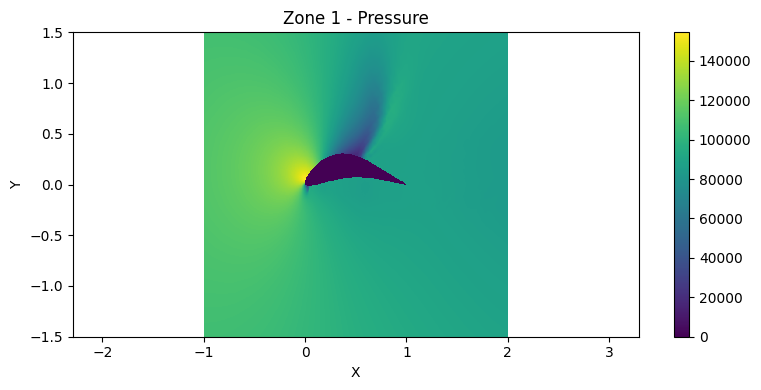

In [3]:
from paraflow import get_flasher, run_simulation, SimulationOptions, get_frames, display_frame, SimulationResult
import numpy as np

flasher = get_flasher("air", "gas")
inlet_total_state = flasher.flash(P=101325.0, T=273.15, mach_number=0.8)


use_cache = False
if not use_cache:
    sim_results = run_simulation(
        passage,
        sim_options=SimulationOptions(
            inlet_total_state=inlet_total_state, 
        ),
        working_directory="./simulation_out", 
        id="1",
        auto_delete=False,
        sim_config={
            "custom_executable_path": "~/simulators/su2/SU2-7.5.2-macos64"
        }
    )
    sim_results.to_file("sim_results.pkl")
else:
   sim_results = SimulationResult.from_file("sim_results.pkl")

frames = get_frames(
    sim_results, 
    property_names=["Pressure"], 
    num_pnts=1000, 
    size=3,
    offset=np.array([0.5,0])
)

display_frame(frames, "Pressure")
